In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
# Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("hr.csv", na_values="?")

In [3]:
data.shape

(1470, 31)

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole  

In [5]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,1,Medium,Female,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below_college,Life Sciences,2,High,Male,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,4,Very high,Male,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,5,Very high,Female,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below_college,Medical,7,Low,Male,...,Very High,80,1,6,3,Better,2,2,2,2


In [6]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:
data.describe()

,Age,DistanceFromHome,EmployeeNumber,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1024.865306,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,602.024335,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1020.500000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1555.750000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,2068.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
IQR = data.quantile(0.75)- data.quantile(0.25)
upper_viscos=data.quantile(0.75)+(1.5)*IQR
lower_viscos=data.quantile(0.75)-(1.5)*IQR

In [9]:
upper_viscos

Age                           62.5
DistanceFromHome              32.0
EmployeeNumber              3152.5
JobLevel                       6.0
MonthlyIncome              16581.0
NumCompaniesWorked             8.5
PercentSalaryHike             27.0
StandardHours                 80.0
StockOptionLevel               2.5
TotalWorkingYears             28.5
TrainingTimesLastYear          4.5
YearsAtCompany                18.0
YearsInCurrentRole            14.5
YearsSinceLastPromotion        7.5
YearsWithCurrManager          14.5
dtype: float64

In [10]:
lower_viscos

Age                         23.5
DistanceFromHome            -4.0
EmployeeNumber             -41.0
JobLevel                     0.0
MonthlyIncome              177.0
NumCompaniesWorked          -0.5
PercentSalaryHike            9.0
StandardHours               80.0
StockOptionLevel            -0.5
TotalWorkingYears            1.5
TrainingTimesLastYear        1.5
YearsAtCompany               0.0
YearsInCurrentRole          -0.5
YearsSinceLastPromotion     -1.5
YearsWithCurrManager        -0.5
dtype: float64

In [11]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [12]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
data.Attrition.value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [14]:
data.drop(['EmployeeNumber'],axis=1,inplace = True)

In [15]:
print(data.shape)
data.head()

(1470, 30)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,High,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below_college,Life Sciences,High,Male,Medium,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Very high,Male,Medium,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very high,Female,High,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below_college,Medical,Low,Male,High,...,Very High,80,1,6,3,Better,2,2,2,2


In [16]:
data.drop(['StandardHours','Over18'],axis=1,inplace=True)

In [17]:
cat_cols = ["Education","BusinessTravel",'Department','EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 
            'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',  'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
num_cols = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

In [18]:
data[num_cols].columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##### 12. Convert all the categorical columns to appropriate data type 

In [19]:
data[cat_cols]=data[cat_cols].astype('category')

In [20]:
data.dtypes

Age                            int64
Attrition                     object
BusinessTravel              category
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel            category
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance             category
YearsAtCompany                 int64
YearsInCurrentRole             int64
YearsSinceLastPromotion        int64
Y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Attrition'],axis=1),data['Attrition'] , test_size = 0.1, random_state = 123)

In [22]:
data["Attrition"][8]

'No'

In [23]:
len(data['Attrition'])

1470

In [24]:
d=[]
for i in range(len(data['Attrition'])):
    if data['Attrition'][i]=='No':
        d.append(0)
    else:
        d.append(1)
d=pd.DataFrame(d)
d


,0
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [25]:
data=pd.concat([data,d],axis=1)


In [26]:
data.columns

Index([                     'Age',                'Attrition',
                 'BusinessTravel',               'Department',
               'DistanceFromHome',                'Education',
                 'EducationField',  'EnvironmentSatisfaction',
                         'Gender',           'JobInvolvement',
                       'JobLevel',                  'JobRole',
                'JobSatisfaction',            'MaritalStatus',
                  'MonthlyIncome',       'NumCompaniesWorked',
                       'OverTime',        'PercentSalaryHike',
              'PerformanceRating', 'RelationshipSatisfaction',
               'StockOptionLevel',        'TotalWorkingYears',
          'TrainingTimesLastYear',          'WorkLifeBalance',
                 'YearsAtCompany',       'YearsInCurrentRole',
        'YearsSinceLastPromotion',     'YearsWithCurrManager',
                                0],
      dtype='object')

In [27]:
data.drop(['Attrition'],axis=1,inplace=True)


In [28]:
data.columns

Index([                     'Age',           'BusinessTravel',
                     'Department',         'DistanceFromHome',
                      'Education',           'EducationField',
        'EnvironmentSatisfaction',                   'Gender',
                 'JobInvolvement',                 'JobLevel',
                        'JobRole',          'JobSatisfaction',
                  'MaritalStatus',            'MonthlyIncome',
             'NumCompaniesWorked',                 'OverTime',
              'PercentSalaryHike',        'PerformanceRating',
       'RelationshipSatisfaction',         'StockOptionLevel',
              'TotalWorkingYears',    'TrainingTimesLastYear',
                'WorkLifeBalance',           'YearsAtCompany',
             'YearsInCurrentRole',  'YearsSinceLastPromotion',
           'YearsWithCurrManager',                          0],
      dtype='object')

In [29]:
data[0]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: 0, Length: 1470, dtype: int64

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1323, 27)
(147, 27)
(1323,)
(147,)


In [31]:
print(y_train.value_counts())

No     1103
Yes     220
Name: Attrition, dtype: int64


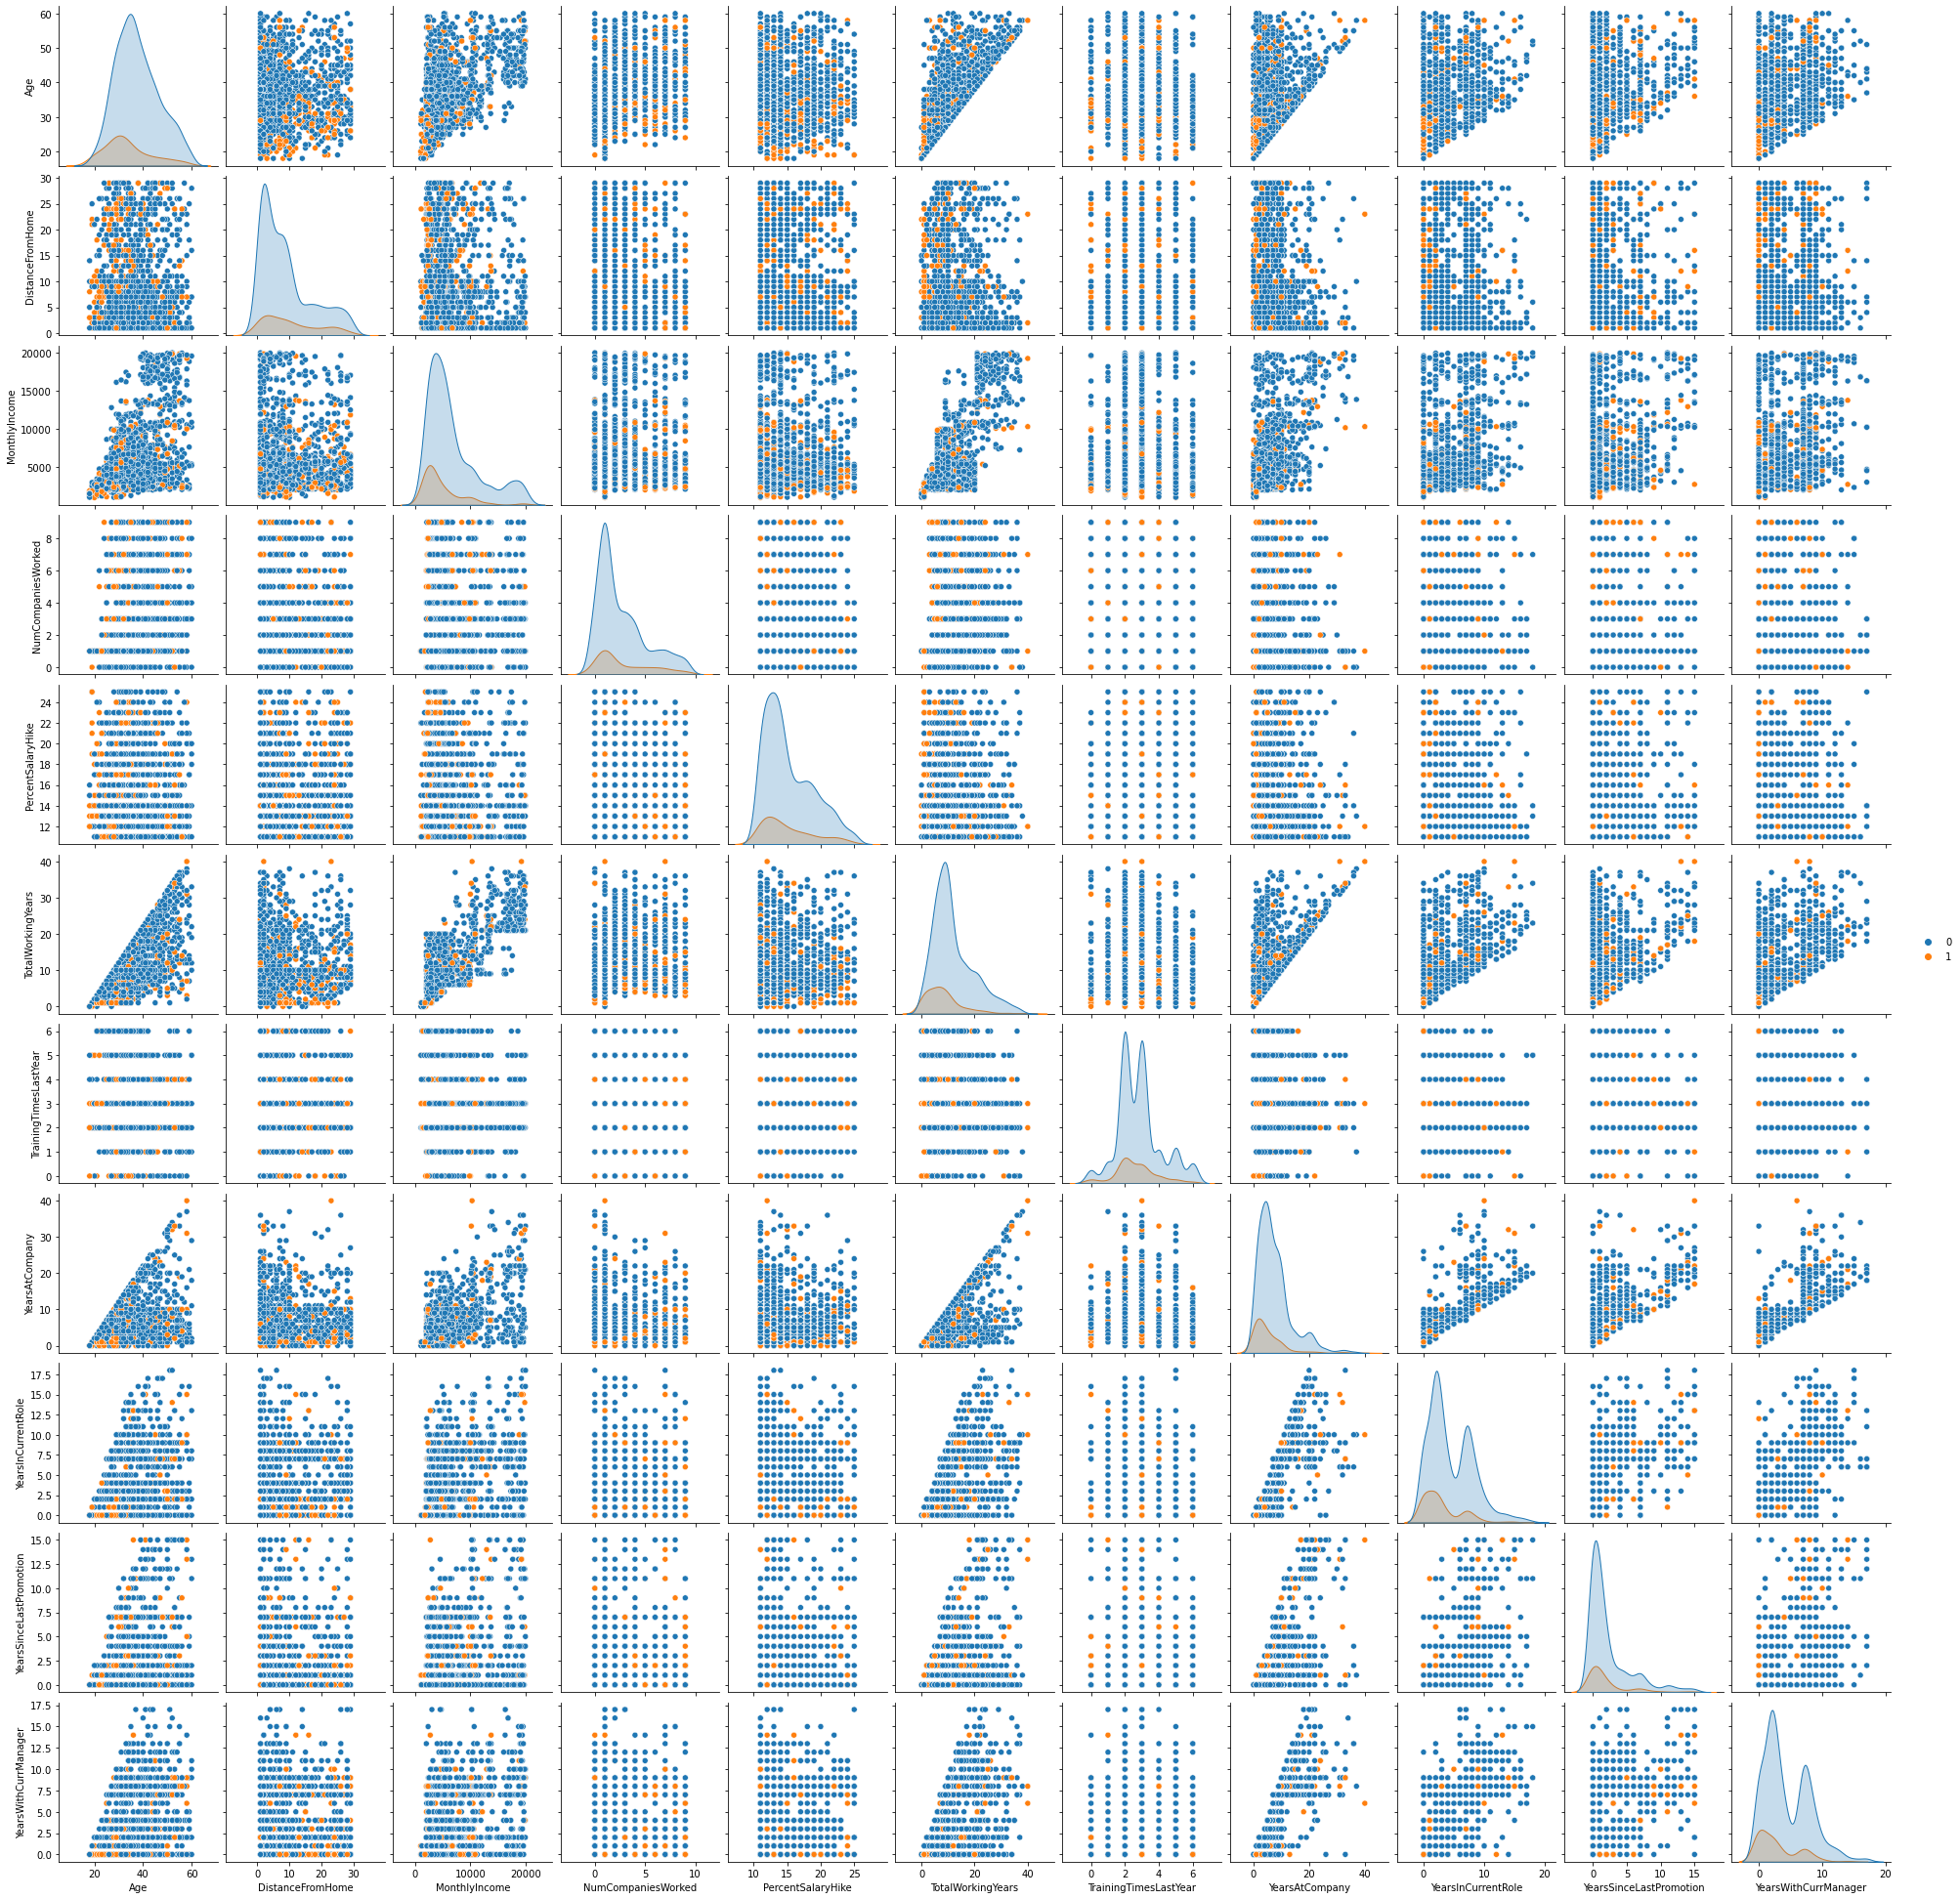

In [32]:
sns.pairplot(data,hue=0)

Age                        AxesSubplot(0.285345,0.437414;0.133621x0.130172)
DistanceFromHome           AxesSubplot(0.285345,0.749828;0.133621x0.130172)
MonthlyIncome               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
NumCompaniesWorked         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
PercentSalaryHike          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
TotalWorkingYears             AxesSubplot(0.125,0.593621;0.133621x0.130172)
TrainingTimesLastYear      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
YearsAtCompany              AxesSubplot(0.44569,0.593621;0.133621x0.130172)
YearsInCurrentRole         AxesSubplot(0.606034,0.593621;0.133621x0.130172)
YearsSinceLastPromotion    AxesSubplot(0.766379,0.593621;0.133621x0.130172)
YearsWithCurrManager          AxesSubplot(0.125,0.437414;0.133621x0.130172)
dtype: object

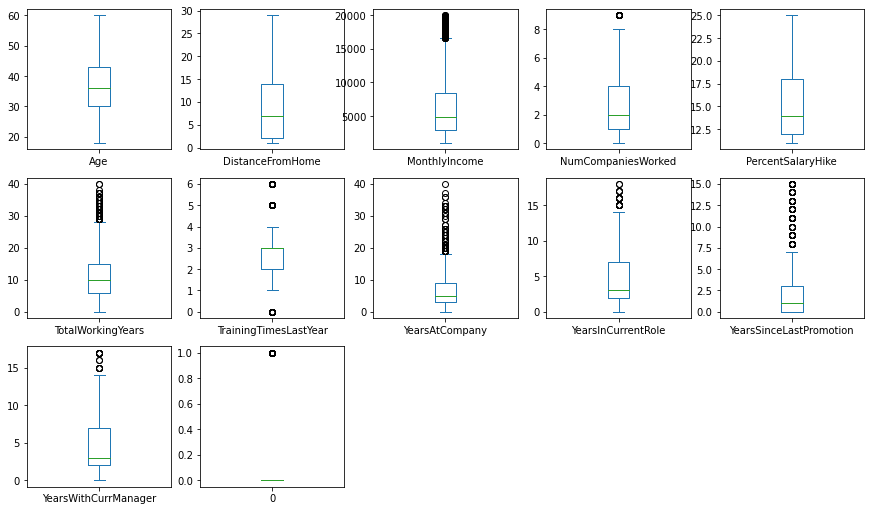

In [33]:
data.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(15,15))

<AxesSubplot:>

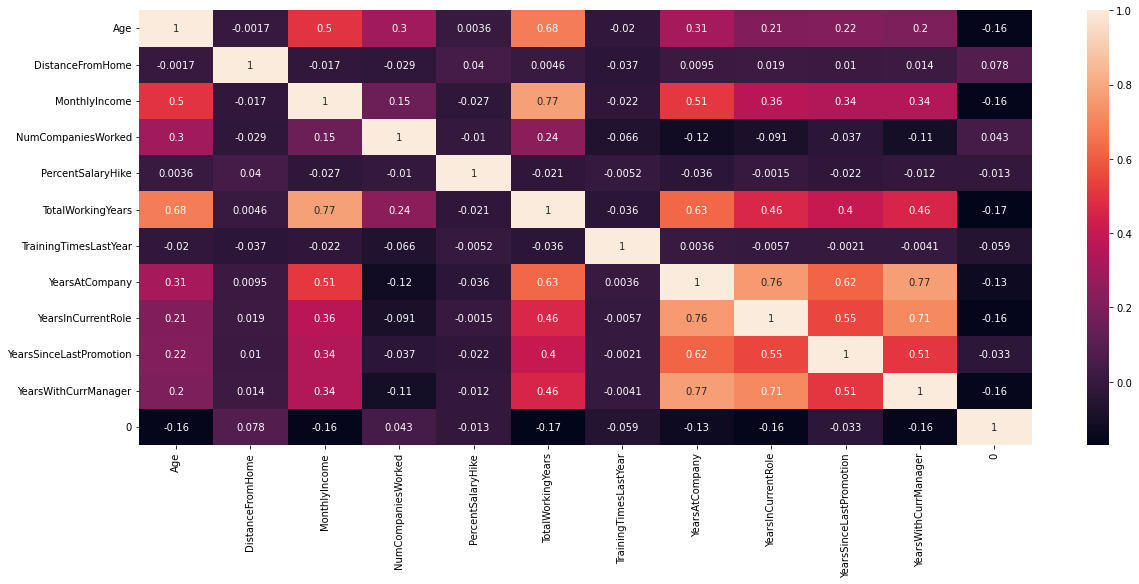

In [34]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True)

In [35]:
data.corr()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,0
Age,1.000000,-0.001686,0.497855,0.299635,0.003634,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089,-0.159205
DistanceFromHome,-0.001686,1.000000,-0.017014,-0.029251,0.040235,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406,0.077924
MonthlyIncome,0.497855,-0.017014,1.000000,0.149515,-0.027269,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079,-0.159840
NumCompaniesWorked,0.299635,-0.029251,0.149515,1.000000,-0.010238,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319,0.043494
PercentSalaryHike,0.003634,0.040235,-0.027269,-0.010238,1.000000,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985,-0.013478
TotalWorkingYears,0.680381,0.004628,0.772893,0.237639,-0.020608,1.000000,-0.035662,0.628133,0.460365,0.404858,0.459188,-0.171063
TrainingTimesLastYear,-0.019621,-0.036942,-0.021736,-0.066054,-0.005221,-0.035662,1.000000,0.003569,-0.005738,-0.002067,-0.004096,-0.059478
YearsAtCompany,0.311309,0.009508,0.514285,-0.118421,-0.035991,0.628133,0.003569,1.000000,0.758754,0.618409,0.769212,-0.134392
YearsInCurrentRole,0.212901,0.018845,0.363818,-0.090754,-0.001520,0.460365,-0.005738,0.758754,1.000000,0.548056,0.714365,-0.160545
YearsSinceLastPromotion,0.216513,0.010029,0.344978,-0.036814,-0.022154,0.404858,-0.002067,0.618409,0.548056,1.000000,0.510224,-0.033019


In [36]:
upper_viscos['Age']

62.5

Text(0, 0.5, 'kms')

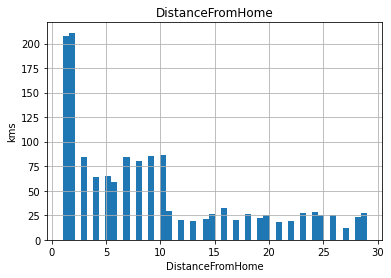

In [37]:
fig=data.DistanceFromHome.hist(bins=50)
fig.set_title('DistanceFromHome')
fig.set_xlabel('DistanceFromHome')
fig.set_ylabel('kms')

In [38]:

for i in range(len(data[num_cols].columns)):
    d=data[num_cols].columns[i]
    for j in range(len(data[d])):
                   if data[d][i]> upper_viscos[d]:
                       data[d][i]='na'
                   elif data[d][i]< lower_viscos[d]:
                       data[d][i]='na'
    

In [39]:
data.isna().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
0                           0
dtype: int64

Text(0, 0.5, 'kms')

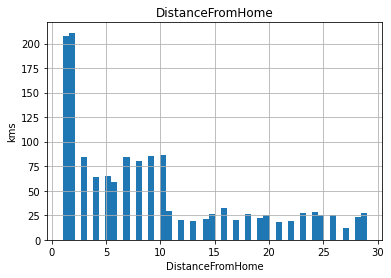

In [40]:
fig=data.DistanceFromHome.hist(bins=50)
fig.set_title('DistanceFromHome')
fig.set_xlabel('DistanceFromHome')
fig.set_ylabel('kms')

In [41]:
print(y_train.value_counts(normalize=True)*100)

No     83.371126
Yes    16.628874
Name: Attrition, dtype: float64


In [42]:
print(y_test.value_counts(normalize=True)*100)

No     88.435374
Yes    11.564626
Name: Attrition, dtype: float64


In [43]:

X_train.isna().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [44]:

X_test.isna().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [45]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [46]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_cat_train)

SimpleImputer(strategy='most_frequent')

In [47]:
df_cat_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_cols)

In [48]:
df_cat_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_cols)

In [49]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [50]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(df_num_train[num_cols])

SimpleImputer(strategy='median')

In [51]:
df_num_train = pd.DataFrame (num_imputer.transform(df_num_train), columns= num_cols)

In [52]:
df_num_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_cols)

In [53]:

X_train = pd.concat([df_num_train, df_cat_train], axis = 1)


X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [54]:
X_train.isna().sum()

Age                         0
DistanceFromHome            0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Education                   0
BusinessTravel              0
Department                  0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
WorkLifeBalance             0
dtype: int64

In [55]:
X_test.isna().sum()

Age                         0
DistanceFromHome            0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Education                   0
BusinessTravel              0
Department                  0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
WorkLifeBalance             0
dtype: int64

In [56]:

X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)


X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [57]:
X_train.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Education_Below_college', 'Education_College',
       'Education_Doctor', 'Education_Master',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_Low',
       'EnvironmentSatisfaction_Medium', 'EnvironmentSatisfaction_Very high',
       'Gender_Male', 'JobInvolvement_Low', 'JobInvolvement_Medium',
       'JobInvolvement_Very high', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobR

In [58]:
X_test.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Education_Below_college', 'Education_College',
       'Education_Doctor', 'Education_Master',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_Low',
       'EnvironmentSatisfaction_Medium', 'EnvironmentSatisfaction_Very high',
       'Gender_Male', 'JobInvolvement_Low', 'JobInvolvement_Medium',
       'JobInvolvement_Very high', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobR

In [59]:

scaler = StandardScaler()

scaler.fit(X_train[num_cols])


X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [60]:
X_train.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,0.570247,-0.880785,-0.348943,0.520759,-0.327087,-0.932678,0.162457,-0.978342,-1.173685,-0.678391,...,0,0,1,0,1,0,0,0,1,0
1,-0.969869,2.212107,-0.341220,-1.072221,1.590100,-0.674641,1.725594,-0.326853,-0.339303,-0.678391,...,1,0,1,0,1,0,0,0,0,1
2,0.020206,-1.004500,-0.004380,1.317248,-0.874855,-0.416604,-0.619111,-0.163980,0.216952,0.578627,...,0,0,1,0,1,0,0,0,0,1
3,-0.419828,-0.138490,-0.713245,1.317248,1.042332,0.357507,-1.400679,0.487509,1.051334,1.521391,...,0,0,1,0,1,0,0,0,1,0
4,0.790264,0.108941,-0.757656,-0.673976,-1.148739,-0.674641,0.944026,-0.163980,-0.061175,-0.678391,...,0,0,0,0,0,0,0,0,1,0


In [61]:
X_test.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,-1.189886,1.964676,-0.895610,-0.673976,-0.874855,-1.319734,-0.619111,-0.978342,-1.173685,-0.678391,...,0,0,0,0,0,0,0,0,0,1
1,-0.199811,-1.004500,-0.462439,-1.072221,-0.327087,0.615544,-0.619111,1.301871,2.441972,-0.049882,...,0,0,1,0,0,0,0,0,1,0
2,-0.199811,1.098666,-0.194469,-1.072221,0.220681,-0.674641,-0.619111,-0.326853,-0.339303,-0.678391,...,0,0,0,1,1,0,0,0,0,0
3,-0.859861,0.727519,-0.885526,-0.673976,1.042332,-0.674641,-1.400679,-0.163980,0.216952,-0.364136,...,0,1,0,0,0,0,0,0,1,0
4,0.570247,-1.004500,-0.834893,0.122514,0.220681,-0.416604,1.725594,-0.326853,-0.617430,-0.364136,...,0,0,1,0,1,0,0,0,1,0


In [62]:
X_train.shape

(1323, 59)

##  model1 LGR

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
test_pred=model.predict(X_test)

In [67]:
train_pred=model.predict(X_train)

In [68]:
confusion_matrix(y_train,train_pred)

array([[1075,   28],
       [ 100,  120]], dtype=int64)

In [69]:
confusion_matrix(y_test,test_pred)

array([[129,   1],
       [  9,   8]], dtype=int64)

In [70]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      1103
         Yes       0.81      0.55      0.65       220

    accuracy                           0.90      1323
   macro avg       0.86      0.76      0.80      1323
weighted avg       0.90      0.90      0.90      1323



In [71]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          No       0.93      0.99      0.96       130
         Yes       0.89      0.47      0.62        17

    accuracy                           0.93       147
   macro avg       0.91      0.73      0.79       147
weighted avg       0.93      0.93      0.92       147



## model 2 DT

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtclf = DecisionTreeClassifier()

In [74]:
dtclf.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
dstrain_pred=model.predict(X_train)
dstest_pred=model.predict(X_test)

In [76]:
confusion_matrix(y_train,dstrain_pred)

array([[1075,   28],
       [ 100,  120]], dtype=int64)

In [77]:
confusion_matrix(y_test,dstest_pred)

array([[129,   1],
       [  9,   8]], dtype=int64)

In [78]:
print(classification_report(y_train,dstrain_pred))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      1103
         Yes       0.81      0.55      0.65       220

    accuracy                           0.90      1323
   macro avg       0.86      0.76      0.80      1323
weighted avg       0.90      0.90      0.90      1323



In [79]:
print(classification_report(y_test,dstest_pred))

              precision    recall  f1-score   support

          No       0.93      0.99      0.96       130
         Yes       0.89      0.47      0.62        17

    accuracy                           0.93       147
   macro avg       0.91      0.73      0.79       147
weighted avg       0.93      0.93      0.92       147



## model 3 Naive

In [80]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [81]:
x_pred  =  classifier.predict(X_train)

In [82]:
y_pred  =  classifier.predict(X_test)

In [83]:
confusion_matrix(x_pred,y_train)

array([[662,  47],
       [441, 173]], dtype=int64)

In [84]:
confusion_matrix(y_pred,y_test)

array([[78,  3],
       [52, 14]], dtype=int64)

In [85]:
print(classification_report(y_train,x_pred))

              precision    recall  f1-score   support

          No       0.93      0.60      0.73      1103
         Yes       0.28      0.79      0.41       220

    accuracy                           0.63      1323
   macro avg       0.61      0.69      0.57      1323
weighted avg       0.83      0.63      0.68      1323



In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.96      0.60      0.74       130
         Yes       0.21      0.82      0.34        17

    accuracy                           0.63       147
   macro avg       0.59      0.71      0.54       147
weighted avg       0.88      0.63      0.69       147



## model 4 SVC

In [87]:
from sklearn.svm import SVC

In [88]:
mod=SVC(kernel= 'linear', random_state=1, C=0.1)
mod.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [89]:
tt_pred = mod.predict(X_train)

In [90]:
ts_pred = mod.predict(X_test)

In [91]:
confusion_matrix(tt_pred,y_train)

array([[1093,  133],
       [  10,   87]], dtype=int64)

In [92]:
confusion_matrix(ts_pred,y_test)

array([[129,   9],
       [  1,   8]], dtype=int64)

In [93]:
print(classification_report(y_train,tt_pred))

              precision    recall  f1-score   support

          No       0.89      0.99      0.94      1103
         Yes       0.90      0.40      0.55       220

    accuracy                           0.89      1323
   macro avg       0.89      0.69      0.74      1323
weighted avg       0.89      0.89      0.87      1323



In [94]:
print(classification_report(y_test,ts_pred))

              precision    recall  f1-score   support

          No       0.93      0.99      0.96       130
         Yes       0.89      0.47      0.62        17

    accuracy                           0.93       147
   macro avg       0.91      0.73      0.79       147
weighted avg       0.93      0.93      0.92       147



## model 5 KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn=KNeighborsClassifier(n_neighbors=7)

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [98]:
knx_pred = mod.predict(X_train)

In [99]:
kny_pred = mod.predict(X_test)

In [100]:
confusion_matrix(knx_pred,y_train)

array([[1093,  133],
       [  10,   87]], dtype=int64)

In [101]:
confusion_matrix(kny_pred,y_test)

array([[129,   9],
       [  1,   8]], dtype=int64)

In [102]:
print(classification_report(y_train,knx_pred))

              precision    recall  f1-score   support

          No       0.89      0.99      0.94      1103
         Yes       0.90      0.40      0.55       220

    accuracy                           0.89      1323
   macro avg       0.89      0.69      0.74      1323
weighted avg       0.89      0.89      0.87      1323



In [103]:
print(classification_report(y_test,kny_pred))

              precision    recall  f1-score   support

          No       0.93      0.99      0.96       130
         Yes       0.89      0.47      0.62        17

    accuracy                           0.93       147
   macro avg       0.91      0.73      0.79       147
weighted avg       0.93      0.93      0.92       147



##  GradientBoosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbr.fit(X_train,y_train)

GradientBoostingClassifier()

In [105]:
tr_predgbc=gbr.predict(X_train)

In [106]:
te_predgbc=gbr.predict(X_test)

In [107]:
confusion_matrix(y_train,tr_predgbc)

array([[1100,    3],
       [  71,  149]], dtype=int64)

In [108]:
confusion_matrix(y_test,te_predgbc)

array([[126,   4],
       [ 11,   6]], dtype=int64)

In [109]:
print(classification_report(y_train,tr_predgbc))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      1103
         Yes       0.98      0.68      0.80       220

    accuracy                           0.94      1323
   macro avg       0.96      0.84      0.88      1323
weighted avg       0.95      0.94      0.94      1323



In [110]:
print(classification_report(y_test,te_predgbc))

              precision    recall  f1-score   support

          No       0.92      0.97      0.94       130
         Yes       0.60      0.35      0.44        17

    accuracy                           0.90       147
   macro avg       0.76      0.66      0.69       147
weighted avg       0.88      0.90      0.89       147



## StackingClasssifier

In [111]:
from sklearn.ensemble import StackingClassifier

In [112]:
estimators=[('model',model),('dtclf',dtclf),('knn=(n_neighbors=7)',knn),('mod=(kernel=linear, random_state=1, C=0.1)',mod),('naive',classifier)]

In [113]:
stack_model = StackingClassifier( estimators = estimators,final_estimator = model)


In [114]:
stack_model.fit(X_train,y_train)

StackingClassifier(estimators=[('model', LogisticRegression()),
                               ('dtclf', DecisionTreeClassifier()),
                               ('knn=(n_neighbors=7)',
                                KNeighborsClassifier(n_neighbors=7)),
                               ('mod=(kernel=linear, random_state=1, C=0.1)',
                                SVC(C=0.1, kernel='linear', random_state=1)),
                               ('naive', GaussianNB())],
                   final_estimator=LogisticRegression())

In [115]:
trStack_pred=stack_model.predict(X_train)

In [116]:
teStack_pred=stack_model.predict(X_test)

In [117]:
confusion_matrix(y_train,trStack_pred)

array([[1084,   19],
       [ 103,  117]], dtype=int64)

In [118]:
confusion_matrix(y_test,teStack_pred)

array([[129,   1],
       [  8,   9]], dtype=int64)

In [119]:
print(classification_report(y_train,trStack_pred))

              precision    recall  f1-score   support

          No       0.91      0.98      0.95      1103
         Yes       0.86      0.53      0.66       220

    accuracy                           0.91      1323
   macro avg       0.89      0.76      0.80      1323
weighted avg       0.90      0.91      0.90      1323



In [120]:
print(classification_report(y_test,teStack_pred))

              precision    recall  f1-score   support

          No       0.94      0.99      0.97       130
         Yes       0.90      0.53      0.67        17

    accuracy                           0.94       147
   macro avg       0.92      0.76      0.82       147
weighted avg       0.94      0.94      0.93       147



In [121]:
dd=pd.read_excel("test_data-1663477366404.xlsx",na_values='?,#')

In [122]:
dd.tail()

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
3786,IMQYY73AOP,30-07-2007,21-08-2007,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment
3787,2AR1OGIMH4,21-08-2004,2004-09-09 00:00:00,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts"
3788,SB4IET2MO5,13-05-2005,2005-02-06 00:00:00,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV..."
3789,3IBWXQK04L,2004-11-04 00:00:00,2004-04-05 00:00:00,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items
3790,FK8SJ5GWYJ,2004-11-04 00:00:00,23-04-2004,BLR,Bangalore,Public Limited Company,Property Loss,In Transit,Furniture


In [123]:
 dd['Date Receive']=pd.to_datetime(dd['Date Received']).dt.date

In [124]:
dd.tail()

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Date Receive
3786,IMQYY73AOP,30-07-2007,21-08-2007,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment,2007-08-21
3787,2AR1OGIMH4,21-08-2004,2004-09-09 00:00:00,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts",2004-09-09
3788,SB4IET2MO5,13-05-2005,2005-02-06 00:00:00,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV...",2005-02-06
3789,3IBWXQK04L,2004-11-04 00:00:00,2004-04-05 00:00:00,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2004-04-05
3790,FK8SJ5GWYJ,2004-11-04 00:00:00,23-04-2004,BLR,Bangalore,Public Limited Company,Property Loss,In Transit,Furniture,2004-04-23
